In [204]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

def z_func(x,y):
 return x**2 + y**2 

def grad(x,y):
    dfdx =  2*x  #0.5*x*np.exp(-x**2/4 - y**2/4)*(x**2-y**3-5)
    dfdy =  2*y  #0.5*y*np.exp(-x**2/4 - y**2/4)*(-x**2+y**3-6*y+1)

    return dfdx, dfdy 

In [250]:
x,y=5,7
lr=0.1
results = [np.array([x,y,z_func(x,y)])]
for i in range(100):
    dx,dy = grad(x,y)
    #print(dx,dy)
    x -= lr*dx
    y -= lr*dy
    results.append(np.array([x,y,z_func(x,y)]))
results = np.array(results)

print(results[-1])

[1.01851799e-09 1.42592518e-09 3.07064152e-18]


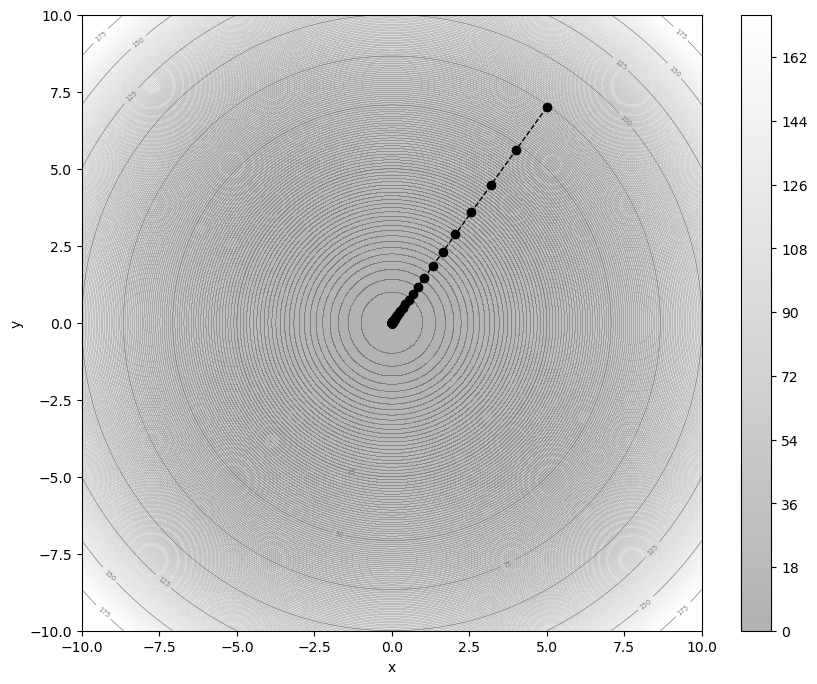

In [252]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = z_func(X,Y) #np.sin(np.sqrt(X**2 + Y**2))

# Create the combined contour plot
plt.figure(figsize=(10, 8))
contourf = plt.contourf(X, Y, Z, cmap='gray', alpha=0.3, levels=range(175))
contour = plt.contour(X, Y, Z, colors='grey', linewidths=0.5)

r1, r2 = np.meshgrid(results[:,0], results[:,1])
plt.clabel(contour, inline=True, fontsize=5)
plt.colorbar(contourf)
plt.plot(results[:,0], results[:,1], 'o--', c='black', linewidth=1)
#plt.title("Descenso por gradiente")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("sgd001.png")
plt.show()

In [253]:
x,y=5,7
lr=0.1
b1,b2 = 0.9, 0.99
mu_x, nu_x = 0,0
mu_y, nu_y = 0,0
results = [np.array([x,y,z_func(x,y)])]
for i in range(100):
    dx,dy = grad(x,y)
    mu_x = b1*mu_x + (1-b1)*dx
    mu_y = b1*mu_y + (1-b1)*dy
    nu_x = b2*nu_x + (1-b2)*dx**2
    nu_y = b2*nu_y + (1-b2)*dy**2
    mu_x_c, mu_y_c = mu_x/(1-b1), mu_y/(1-b1)
    nu_x_c, nu_y_c = nu_x/(1-b2), nu_y/(1-b2)
    x -= (lr/np.sqrt(nu_x_c+1e-8))*mu_x_c
    y -= (lr/np.sqrt(nu_y_c+1e-8))*mu_y_c
    results.append(np.array([x,y,z_func(x,y)]))
results = np.array(results)
print(results[-1])

[ 0.02303722 -0.0273423   0.00127831]


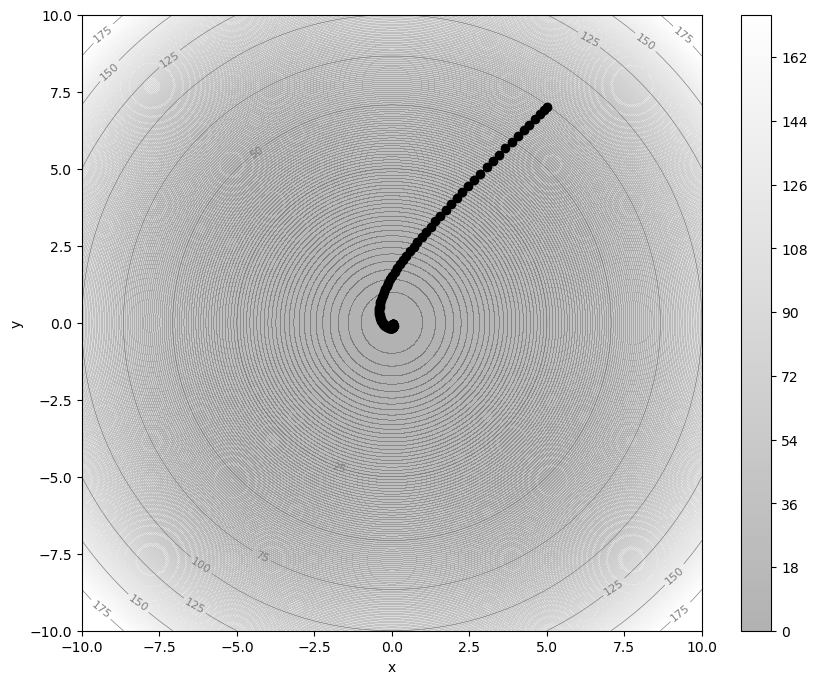

In [254]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = z_func(X,Y) #np.sin(np.sqrt(X**2 + Y**2))

# Create the combined contour plot
plt.figure(figsize=(10, 8))
contourf = plt.contourf(X, Y, Z, cmap='gray', alpha=0.3, levels=range(175))
contour = plt.contour(X, Y, Z, colors='grey', linewidths=0.5)

r1, r2 = np.meshgrid(results[:,0], results[:,1])
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(contourf)
plt.plot(results[:,0], results[:,1], 'o--', c='black', linewidth=1)
#plt.title("Adam")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("adam001.png")
plt.show()